# Tutorial: Running mediation and moderation models

This lab focuses on mediation and moderation and implementing these techniques in R.

## Goals:
* Understand the difference between moderation and mediation.
* Learn how to detect mediation effects using the `mediate` function.
* Learn how to detect moderating effects.

This tutorial draws from [Chapter 14: Mediation and Moderation](https://ademos.people.uic.edu/Chapter14.html) in a collection of tutorials by psychology grad students at the University of Illinois at Chicago.

---
# The difference between mediation and moderation

First, let's reiterate the difference between mediation and moderation. 

For an independent variable $X$, a dependent variable $Y$ and a third variable $M_e$, **mediation** is when the value of $X$ impacts the value of $M_e$, which in turn predicts the value of $Y$. Put differently, if $X$ operates on $Y$ through $M_e$, then $M_e$ is a mediating variable: $X \rightarrow M_e \rightarrow Y$

A couple examples of mediation:

* For Spanish language learners who move from the U.S. to Spain, time since they moved to Spain ($X$) predicts ability to speak Spanish ($Y$) because they get more *practice* speaking and comprehending Spanish ($M_e$) the more time they spend there. $M_e$ is an important mediator to note, because if you spend a long time in Spain without speaking or listening to Spanish, your Spanish skills will not improve. In this example, practice *mediates* the effect of time on ability.
* Maybe you've noticed that there are better discussions during lab meetings when you order pizza. This is probably because of the impact of pizza on both attendance and the mood of the attendees, and so both of these could be mediating variables between pizza and discussion quality. 

In contrast, **moderation** describes how a third variable $M_o$ impacts the relationship between $X$ and $Y$. Perhaps the relationship between $X$ and $Y$ is stronger when $M_o$ is positive than when $M_o$ is negative. Moderating variables basically contextualize the $X \rightarrow Y$ relationship, instead of causing it like mediating variables do. Moderation is basically an interaction effect, where one of the independent variables is regarded as less important to the scientific question and is thus deemed a "moderator" instead of a "predictor". 

A couple examples of moderation: 
* The relationship between importance of a task ($X$) and testing anxiety ($Y$) is moderated by self-efficacy ($M_o$). Most students feel low anxiety for unimportant assignments, but those with low self-efficacy are more stressed during important exams than those with high self-efficacy. What's key in this example is the interaction between self-efficacy and task importance: the relationship between task importance and anxiety varies for different levels of self efficacy, and the relationship between self efficacy and anxiety varies for different levels of task importance.
* The relationship between time of year and a person's Vitamin D deficiency is moderated by location - in Boston, Vitamin D deficiency might peak in February; in Punta Arenas, Chile it might peak in September; and in a place that's mostly sunny year-round like Florida the relationship between time of year and deficiency might be weak or nonexistent. *What would be a mediating variable between time of year and vitamin D deficiency?*


---
# Mediation in R

Now let's try finding evidence for mediation using R. We'll use the `Cars93` dataset we've used in previous tutorials.

In [ ]:
install.packages("mediation") # uncomment to install the mediation package. 
library(mediation)
library(MASS)
library(tidyverse)
names(Cars93)
# ?mediate # uncomment to learn about the mediate function

[1] "Manufacturer"       "Model"              "Type"              
 [4] "Min.Price"          "Price"              "Max.Price"         
 [7] "MPG.city"           "MPG.highway"        "AirBags"           
[10] "DriveTrain"         "Cylinders"          "EngineSize"        
[13] "Horsepower"         "RPM"                "Rev.per.mile"      
[16] "Man.trans.avail"    "Fuel.tank.capacity" "Passengers"        
[19] "Length"             "Wheelbase"          "Width"             
[22] "Turn.circle"        "Rear.seat.room"     "Luggage.room"      
[25] "Weight"             "Origin"             "Make"

The effect we're interested in for this example is the relationship between `Passengers` (the max number of passengers the car model is designed to carry) and `MPG.highway` (the number of miles per gallon the car gets on the highway. Look at the model and visualization of this relationship below. 



Call:
lm(formula = MPG.highway ~ Passengers, data = Cars93)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4720  -2.2919  -0.5052   1.7081  18.3147 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.2587     2.4697   16.71  < 2e-16 ***
Passengers   -2.3934     0.4759   -5.03 2.46e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.742 on 91 degrees of freedom
Multiple R-squared:  0.2175,	Adjusted R-squared:  0.2089 
F-statistic:  25.3 on 1 and 91 DF,  p-value: 2.456e-06


`geom_smooth()` using formula 'y ~ x'



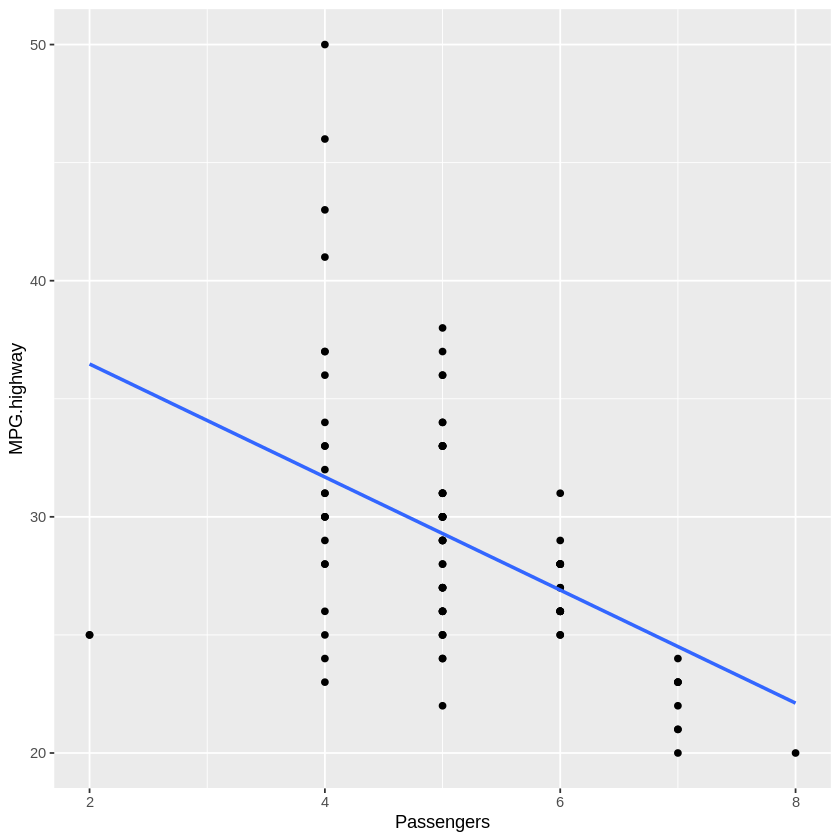

In [ ]:
fitStart <- lm(MPG.highway ~ Passengers, data=Cars93)
summary(fitStart)
ggplot(Cars93,aes(x=Passengers,y=MPG.highway)) + geom_point() + geom_smooth(method="lm",se=FALSE)

While it is not clear what's going on with that 2-person vehicle in the bottom left, generally we can see that more passengers means worse mileage on the highway. But let's take a minute to think about *why* that is. Cars that can hold more passengers tend to be bigger. I'm not a car person, but it makes sense heavier cars and cars with more air resistance would need to use more gas to maintain the same speed as lighter, more compact cars. Let's just focus on weight in this example: is `Weight` a mediating variable between `Passengers` and `MPG.highway`? In other words, is weight the causal link between these two variables? 

The way we'll answer this question is using the `mediate` function from the `mediation` package we installed above. The logic behind this analysis is as follows:
1. If there's a relationship between $X$ and $M_e$
2. And when you include both $M_e$ and $X$ in a model to predict $Y$, the effect of $X$ on $Y$ goes away
3. Then the original effect of $X$ on $Y$ (which we showed above) must be mediated by $M_e$.

The `mediate` function takes in models that capture steps 1 and 2 above, and outputs a conclusion regarding 3. 

In [ ]:
fitM <- lm(Weight ~ Passengers,     data=Cars93) #Step 1: IV on M, Number of passengers predicting weight of car
fitY <- lm(MPG.highway ~ Weight + Passengers, data=Cars93) #Step 2: IV and M on DV, Number of passengers and weight predicting highway
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="Passengers", mediator="Weight")
summary(fitMed)



Call:
lm(formula = Weight ~ Passengers, data = Cars93)

Residuals:
     Min       1Q   Median       3Q      Max 
-1036.75  -381.75    36.73   308.25  1276.51 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1475.23     257.31   5.733 1.27e-07 ***
Passengers    314.13      49.58   6.336 8.85e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 494.1 on 91 degrees of freedom
Multiple R-squared:  0.3061,	Adjusted R-squared:  0.2985 
F-statistic: 40.14 on 1 and 91 DF,  p-value: 8.85e-09



Call:
lm(formula = MPG.highway ~ Weight + Passengers, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7134 -1.8418 -0.0271  1.8858 11.5668 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 51.8777927  1.9165318  27.069   <2e-16 ***
Weight      -0.0071983  0.0006692 -10.756   <2e-16 ***
Passengers  -0.1321634  0.3799662  -0.348    0.729    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.154 on 90 degrees of freedom
Multiple R-squared:  0.6576,	Adjusted R-squared:   0.65 
F-statistic: 86.44 on 2 and 90 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             -2.246       -3.058        -1.44  <2e-16 ***
ADE              -0.135       -0.857         0.65    0.73    
Total Effect     -2.382       -3.371        -1.43  <2e-16 ***
Prop. Mediated    0.942        0.688         1.36  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 93 


Simulations: 1000 


The first model established that there was a significant relationship between `Weight` and `Passengers`. The second model established that when you include `Weight` in the model, `Passengers` is no longer a significant predictor of `MPG.highway`. The last one shows us that there is a strong mediating effect. `ACME` represents the mediating or indirect effect, which can be thought of as answering the question "Given this model, would I predict that $Y$ would change significantly when I vary $M_e$ but hold $X$ constant?" `ADE` answers the opposite question, varying $X$ while holding $M_e$ constant ("direct effect"). The `Total Effect` combines the direct and indirect effects, and `Prop. Mediated` is the proportion of indirect effects relative to direct effects. The results above tell us that the relationship between `Passengers` and `MPG.highway` is entirely mediated by `Weight`.

*Note: the ouput above says "Simulations: 1000" at the bottom. There is a bootstrapping feature for the mediate function, and the default settings are `boot = FALSE` and `sims = 1000`. Even though no bootstrapping was done in this example it still outputs the number of simulations it would have run, for some reason. If you're interested, play around with the bootstrap functionality by setting `boot = TRUE` and see whether that impacts your results. Since this is a strong result, it probably won't.*

---
# Moderation in R

As discussed above, looking for moderation is basically the same as looking for an interaction. If the relationship between $X$ and $Y$ is moderated by $M_o$, then the interaction between $X$ amd $M_o$ should be significant. We can look at this using the simple `lm()` function. 

We'll stick with the `Cars93` data set, and see if the relationship between `Weight` and `MPG.highway` is moderated by `Horsepower` - in other words, do cars with more powerful engines show a different relationship between `Weight` and `MPG.highway` than cars with less powerful engines do?

In [ ]:
fitMod <- lm(MPG.highway ~ Horsepower*Weight,data=Cars93)
summary(fitMod)


Call:
lm(formula = MPG.highway ~ Horsepower * Weight, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6537 -1.9269 -0.2388  1.9899 11.6858 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.551e+01  4.537e+00  14.440  < 2e-16 ***
Horsepower        -1.347e-01  3.955e-02  -3.406 0.000991 ***
Weight            -1.132e-02  1.493e-03  -7.585 3.06e-11 ***
Horsepower:Weight  3.822e-05  1.132e-05   3.377 0.001088 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.984 on 89 degrees of freedom
Multiple R-squared:  0.6969,	Adjusted R-squared:  0.6867 
F-statistic: 68.21 on 3 and 89 DF,  p-value: < 2.2e-16


Since the `Horsepower:Weight` term is significant, there might be some moderation going on here! To understand the relationship better, let's do a split-half visualization for cars with lower horsepower and cars with higher horsepower. 

`geom_smooth()` using formula 'y ~ x'



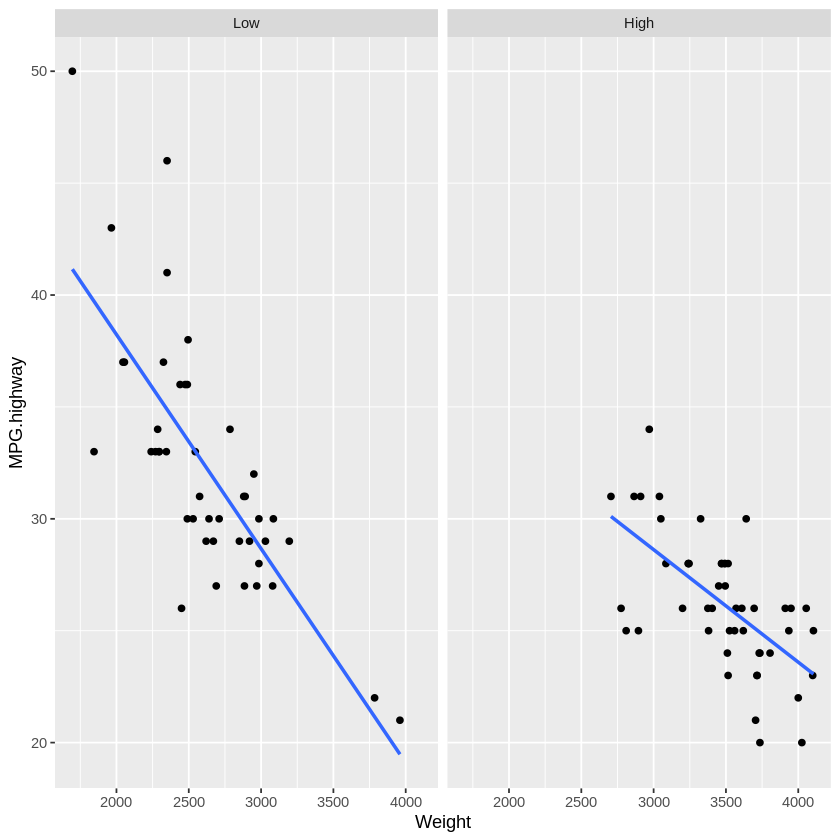

In [12]:
medH <- median(Cars93$Horsepower)
Cars93 %>%
  # make a new variable for split half vis: is horsepower above or below median?
  mutate(highHorsepower = factor(ifelse(Horsepower < medH,"Low","High"),levels=c("Low","High"))) %>% # "levels" just makes "low" appear on left
  ggplot(.,aes(x = Weight,y = MPG.highway)) + 
  geom_point() + geom_smooth(method="lm",se=FALSE) + # add points and a fit line
  facet_grid(.~highHorsepower)

This was a useful visualization. Now we know that the different relationship between weight and efficiency for powerful engines versus less powerful engines might be because cars with more horsepower are typically heavier. In other words, `Horsepower` and `Weight` are correlated, and we've violated one of the assumptions for using linear models - oops! So we can't interpret the moderation in this case. Dealing with correlated predictor variables will be discussed later in this class.

*Notebook authored by Patience Stevens and edited by Amy Sentis.*